
Exercises
All of the exercises are focused on practicing the code in the sections above.

You should be able to complete them by referencing each section or by following the resource(s) linked.

All exercises should be completed using device-agonistic code.

### 1. Make a binary classification dataset with Scikit-Learn's make_moons() function.
* For consistency, the dataset should have 1000 samples and a random_state=42.
* Turn the data into PyTorch tensors. Split the data into training and test sets using train_test_split with 80% training and 20% testing.

In [1]:
# Import the required libraries
import torch
from sklearn.datasets import make_moons

# setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'device: {device}')
print(torch.__version__)

device: cuda
2.2.1+cu121


In [2]:
X,y = make_moons(n_samples = 1000,
                 noise = 0.07,
                 random_state = 42)
print(f'size of X and y are: {len(X)}')
print(f'sample of X: {X[:10]}\ty: {y[:10]}')
print(f'type of X: {type(X)}, y: {type(y)}')
print(f'dtype of X: {X.dtype}, y: {y.dtype}')

size of X and y are: 1000
sample of X: [[-0.03341062  0.4213911 ]
 [ 0.99882703 -0.4428903 ]
 [ 0.88959204 -0.32784256]
 [ 0.34195829 -0.41768975]
 [-0.83853099  0.53237483]
 [ 0.59906425 -0.28977331]
 [ 0.29009023 -0.2046885 ]
 [-0.03826868  0.45942924]
 [ 1.61377123 -0.2939697 ]
 [ 0.693337    0.82781911]]	y: [1 1 1 1 0 1 1 1 1 0]
type of X: <class 'numpy.ndarray'>, y: <class 'numpy.ndarray'>
dtype of X: float64, y: int64


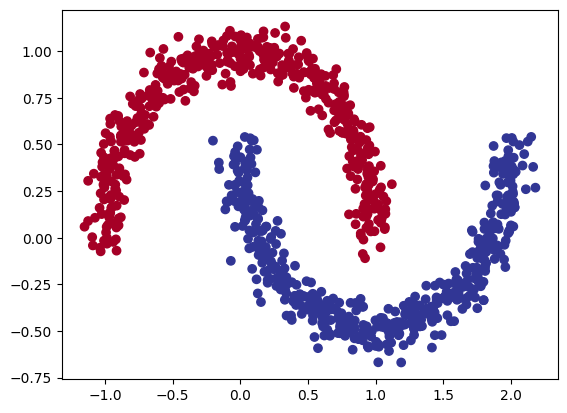

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.RdYlBu)

In [4]:
# turning the data into tensors
X = torch.tensor(X).type(torch.float)
y = torch.tensor(y).type(torch.float)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)
print(len(X_train), len(X_test), len(y_train), len(y_test))
print(X_test[:10],y_train[:10])

800 200 800 200
tensor([[ 0.5425, -0.3964],
        [ 0.8411,  0.6354],
        [ 1.2745, -0.4373],
        [ 0.6870,  0.8720],
        [ 1.8176, -0.1365],
        [ 1.9798,  0.0238],
        [ 1.0306,  0.2572],
        [ 1.0447,  0.1011],
        [ 1.1895, -0.6691],
        [ 0.7069,  0.6293]]) tensor([1., 0., 0., 0., 1., 0., 1., 1., 0., 0.])


### 2. Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
* Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [20]:
class MoonModelV0(torch.nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = torch.nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = torch.nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = torch.nn.Linear(in_features = 10, out_features = 1)
    self.activation = torch.nn.ReLU() # try with Relu also

  def forward(self, x):
    return self.layer_3(self.activation(self.layer_2(self.activation(self.layer_1(x)))))

model_0 = MoonModelV0()
model_0

MoonModelV0(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (activation): ReLU()
)

In [21]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.2408,  0.3237],
                      [ 0.1345, -0.6454],
                      [ 0.6933, -0.1836],
                      [-0.2687,  0.6759],
                      [-0.4311,  0.1949],
                      [-0.1430,  0.6980],
                      [ 0.3403, -0.4015],
                      [-0.5801, -0.3719],
                      [-0.0371,  0.2992],
                      [ 0.2012, -0.4759]])),
             ('layer_1.bias',
              tensor([-0.2866,  0.3516, -0.4690, -0.0862, -0.6648,  0.5166,  0.4305, -0.2501,
                      -0.3728, -0.0242])),
             ('layer_2.weight',
              tensor([[ 0.0941,  0.1340, -0.3003, -0.0539, -0.0638,  0.0501, -0.0231,  0.2147,
                       -0.0689,  0.2714],
                      [ 0.1285,  0.1878, -0.0331, -0.1237,  0.2048, -0.2929,  0.2315,  0.0360,
                       -0.0005, -0.1442],
                      [-0.2294,  0.1646, -0.0455, -0.1551,  0.2733, -0.1

### 3. Setup a binary classification compatible loss function and optimizer to use when training the model.

In [22]:
loss_fn = torch.nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model_0.parameters(),
                             lr = 0.1)

### 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
* To measure model accuray, you can create your own accuracy function or use the accuracy function in TorchMetrics.
* Train the model for long enough for it to reach over 96% accuracy.
* The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [23]:
start = 0
end = 1
step1 = 0.1
step2 = 0.2
temp1 = torch.arange(start, end, step1)
temp2 = torch.arange(start, 2*end, step2)
print(temp1)
print(temp2)
print(torch.eq(temp1, temp2).sum())
temp3 = torch.tensor(1)
type(temp3)
type(int(temp3))

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000])
tensor([0.0000, 0.2000, 0.4000, 0.6000, 0.8000, 1.0000, 1.2000, 1.4000, 1.6000,
        1.8000])
tensor(1)


int

In [24]:
# Creatng own accuracy function
def accuracy_fn(y_true, y_pred):
  correct = int(torch.eq(y_true, y_pred).sum())
  return (correct/len(y_true))*100

In [25]:
# accuracy using torchmetrics
!pip install torchmetrics

In [26]:
from torchmetrics import Accuracy
torchmetrics_accuracy = Accuracy(task = 'binary', num_classes = 2).to(device)
# torchmetrics_accuracy = Accuracy(task="multiclass", num_classes=2).to(device)
torchmetrics_accuracy.device

device(type='cuda', index=0)

In [27]:
# moving inputs to the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

print('shape:')
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

shape:
X_train: torch.Size([800, 2]), y_train: torch.Size([800])
X_test: torch.Size([200, 2]), y_test: torch.Size([200])


In [28]:
# y_pred_logits.shape

In [29]:
# Training and Testing loop


epochs = 1000
model_0.to(device)

for epoch in range(epochs):
  # train mode
  model_0.train()

  # Forward pass
  y_pred_logits = model_0(X_train).squeeze()
  y_pred_prob = torch.sigmoid(y_pred_logits)
  y_pred = torch.round(y_pred_prob)

  # claculate the loss
  loss = loss_fn(y_pred_logits, y_train)
  acc = torchmetrics_accuracy(y_pred, y_train)

  # optimizer zero grad
  optimizer.zero_grad()

  # loss backward (backpropagation)
  loss.backward()

  # optimizer step
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    y_pred_logits_test = model_0(X_test).squeeze()
    y_pred_test = torch.round(torch.sigmoid(y_pred_logits_test))

    loss_test = loss_fn(y_pred_logits_test, y_test)
    acc_test = torchmetrics_accuracy(y_pred_test, y_test)
  if epoch % 100 ==0:
    print(f'loss: {loss} | accuracy: {acc} | test loss: {loss_test} | test accuracy: {acc_test}')

loss: 0.7204838395118713 | accuracy: 0.5 | test loss: 0.7132569551467896 | test accuracy: 0.5
loss: 0.2889484763145447 | accuracy: 0.8650000095367432 | test loss: 0.29483383893966675 | test accuracy: 0.8550000190734863
loss: 0.24373798072338104 | accuracy: 0.8837500214576721 | test loss: 0.2415178269147873 | test accuracy: 0.8949999809265137
loss: 0.23005080223083496 | accuracy: 0.8974999785423279 | test loss: 0.22700656950473785 | test accuracy: 0.9049999713897705
loss: 0.21520355343818665 | accuracy: 0.9012500047683716 | test loss: 0.21214915812015533 | test accuracy: 0.8999999761581421
loss: 0.1929442584514618 | accuracy: 0.9150000214576721 | test loss: 0.1894855797290802 | test accuracy: 0.9049999713897705
loss: 0.16254520416259766 | accuracy: 0.9287499785423279 | test loss: 0.15845267474651337 | test accuracy: 0.925000011920929
loss: 0.12502457201480865 | accuracy: 0.9424999952316284 | test loss: 0.11976613104343414 | test accuracy: 0.9599999785423279
loss: 0.0850602239370346 | ac

In [30]:
import requests
from pathlib import Path

# Download helper function from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


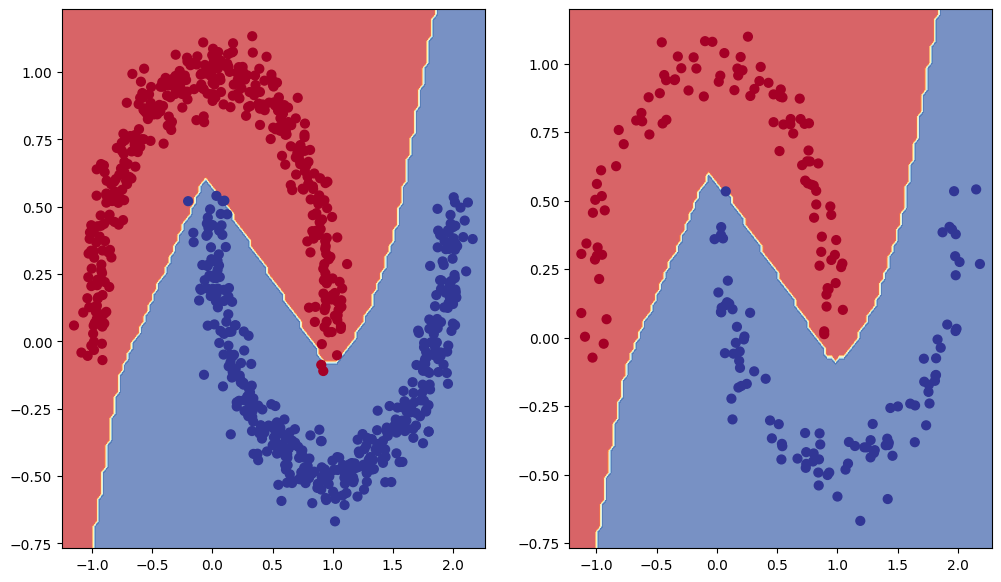

In [31]:
plt.figure(figsize = (12,7))
plt.subplot(1,2,1)
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model_0, X_test, y_test)

### 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
* Feel free to reference the ML cheatsheet website for the formula.

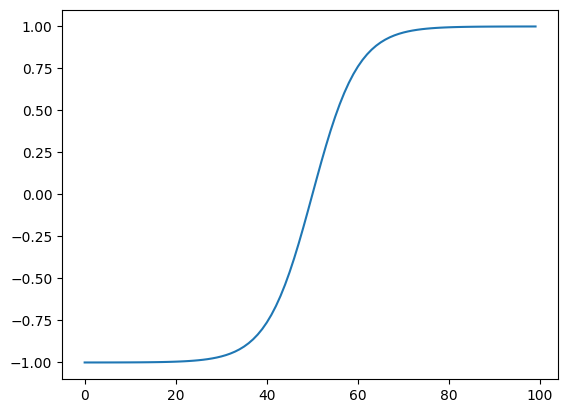

In [32]:
# Tanh
def tanh_fn(x):
  return ((torch.exp(x)-torch.exp(-x)))/( (torch.exp(x)+torch.exp(-x)))

start = -5
end = 5
step = 0.1
tanh_ip = torch.arange(start, end, step)
plt.plot(tanh_fn(tanh_ip))

### 7. Create a multi-class dataset using the spirals data creation function from CS231n (see below for the code).
* Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
* Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
* Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like).
* Plot the decision boundaries on the spirals dataset from your model predictions, the plot_decision_boundary() function should work for this dataset too.

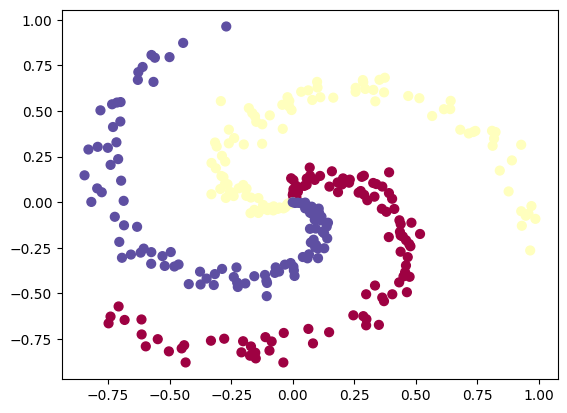

In [118]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [119]:
# setting up the device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [129]:
# converting the inputs into tensors
X = torch.from_numpy(X).type(torch.float).to(device)
y = torch.from_numpy(y).type(torch.LongTensor).to(device)
X[0].shape, y[0].shape

TypeError: expected np.ndarray (got Tensor)

In [130]:
# train and test split using sklearn.model_selection.train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 42,
                                                    test_size = 0.2)
len(X_train), len(y_train), len(X_test), len(y_test)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [131]:
class SpiralModelV0(torch.nn.Module):
  def __init__(self, in_features, hidden_features, out_features):
    super().__init__()
    self.layer_1 = torch.nn.Linear(in_features = in_features, out_features = hidden_features);
    self.layer_2 = torch.nn.Linear(in_features = hidden_features, out_features = hidden_features);
    self.layer_3 = torch.nn.Linear(in_features = hidden_features, out_features = out_features);
    self.activation = torch.nn.ReLU()

  def forward(self, x : torch.Tensor) -> torch.Tensor:
    return self.layer_3(self.activation(self.layer_2(self.activation(self.layer_1(x)))))

model_1 = SpiralModelV0(2, 10, 3).to(device)
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.3789,  0.0982],
                      [-0.6844, -0.2119],
                      [-0.0778, -0.3115],
                      [-0.0547,  0.1511],
                      [-0.6772,  0.2040],
                      [-0.0648,  0.4585],
                      [ 0.4759, -0.4044],
                      [-0.4206,  0.5413],
                      [ 0.4960,  0.6754],
                      [-0.1490,  0.4647]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.5301, -0.3429,  0.3489,  0.6988, -0.6075, -0.5844, -0.0504,  0.6714,
                      -0.2749, -0.3713], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.0096, -0.1048, -0.0378,  0.0981,  0.2603,  0.0674,  0.2710, -0.3105,
                        0.2383,  0.2910],
                      [ 0.0613, -0.2542,  0.2316,  0.2833,  0.0984,  0.0073,  0.3065, -0.2394,
                       -0.3020, -0.0162],
                      [ 0.2324,  0.071

In [132]:
# setting up the loss function and optimizer
loss_fn = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params = model_1.parameters(),
                            lr = 0.1)

In [133]:
temp_y_pred = model_1(X_test)
torch.round(torch.sigmoid(temp_y_pred)).shape

torch.Size([60, 3])

In [134]:
torchmetrics_accuracy_1 = Accuracy(task = 'multiclass', num_classes = 3).to(device)
torchmetrics_accuracy_1

MulticlassAccuracy()

In [135]:
print(X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype)

torch.float32 torch.float32 torch.int64 torch.int64


In [136]:
# building training and testing loop
epochs = 1000



for epoch in range(epochs):
  model_1.train()
  # forward pass
  # we get logits as outputs from the model
  # logits -> prediction probabilities (using sigmoid function) -> prediction classes
  y_pred_logits = model_1(X_train)
  y_pred = torch.softmax(y_pred_logits,dim = 1).argmax(dim = 1)
  # print(f"y_pred shape: {y_pred.shape}")


  # claculate the loss
  loss = loss_fn(y_pred_logits, y_train)
  acc = torchmetrics_accuracy_1(y_pred, y_train)

  # optimizer zero grad
  optimizer.zero_grad()

  # loss backward (backpropagation)
  loss.backward()

  # optimizer step
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    # forward pass
    y_eval_logits = model_1(X_test)
    y_eval = torch.softmax(y_eval_logits,dim = 1).argmax(dim = 1)

    # loss calculation
    loss_eval = loss_fn(y_eval_logits,y_test)
    acc_eval = torchmetrics_accuracy_1(y_eval, y_test)
  if epoch % 100 == 0:
    print(f'epoch: {epoch} | train loss: {loss} | train accuracy: {acc} | test loss: {loss_eval} | test accuracy: {acc_eval}')

epoch: 0 | train loss: 1.1194226741790771 | train accuracy: 0.32499998807907104 | test loss: 1.080525279045105 | test accuracy: 0.4333333373069763
epoch: 100 | train loss: 0.023905711248517036 | train accuracy: 0.9916666746139526 | test loss: 0.0025103711523115635 | test accuracy: 1.0
epoch: 200 | train loss: 0.017600197345018387 | train accuracy: 0.9916666746139526 | test loss: 0.0007612854242324829 | test accuracy: 1.0
epoch: 300 | train loss: 0.01592477411031723 | train accuracy: 0.9916666746139526 | test loss: 0.0003299055097158998 | test accuracy: 1.0
epoch: 400 | train loss: 0.014798540621995926 | train accuracy: 0.9916666746139526 | test loss: 0.00028034421848133206 | test accuracy: 1.0
epoch: 500 | train loss: 0.014780947007238865 | train accuracy: 0.9916666746139526 | test loss: 0.000330419628880918 | test accuracy: 1.0
epoch: 600 | train loss: 0.014580064453184605 | train accuracy: 0.9916666746139526 | test loss: 0.0003643301606643945 | test accuracy: 1.0
epoch: 700 | train l

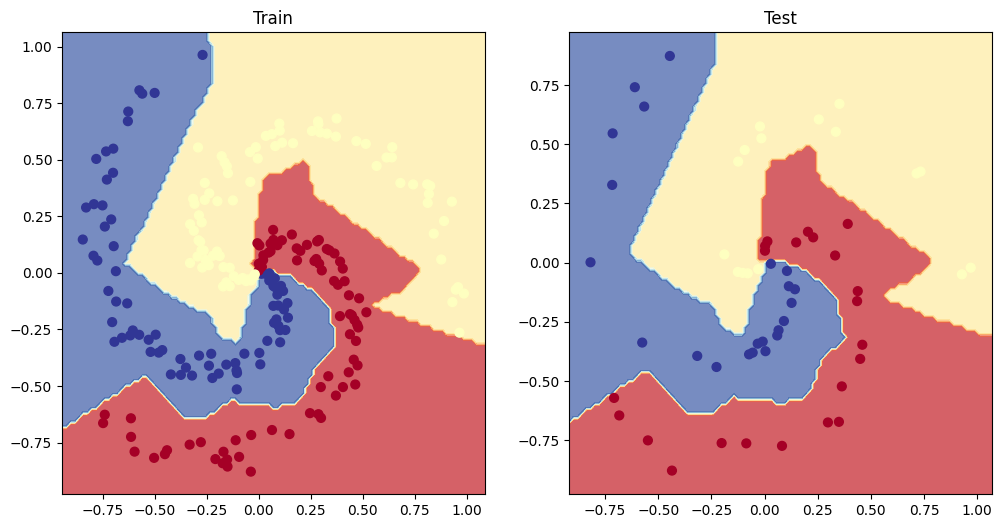

In [137]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)